## Detailed Exploratory Data Analysis of the Titanic ML data set.

In [103]:
# libraries used for data manipulation
import pandas as pd
import numpy as np
# libraries used for predictive modelling
from sklearn import linear_model
# libraries used for data visualizations
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
# ignore warnings from plotting
import warnings
warnings.filterwarnings("ignore")

In [134]:
# Read in initial training and testing datasets locally
titanictrain = pd.read_csv('C:\\Users\\timho\\OneDrive\\Desktop\\ML\\Titanictrain.csv')
titanictest = pd.read_csv('C:\\Users\\timho\\OneDrive\\Desktop\\ML\\Titanictest.csv')

#### The training dataset consists of 891 rows and 12 columns. The test dataset consists of 418 rows and 11 columns.

In [135]:
print(titanictest.shape)
print(titanictrain.shape)

(418, 11)
(891, 12)


#### For EDA we will combine the test and training datasets to get a full understanding of all dependent variables

In [136]:
frames = [titanictest, titanictrain]
fulldf = pd.concat(frames)
fulldf.shape

(1309, 12)

#### It appears that the dataframe is missing instances of Age and instances of Cabin.

In [140]:
print(fulldf.isnull().sum())

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived        418
dtype: int64


#### Replace NA's in the Cabin and Age columns with the mode and median of the respective column.

In [143]:
fulldf['Cabin'].fillna(fulldf['Cabin'].mode()[0], inplace=True)
#fulldf['Age'].median
#fulldf['Age'] = fulldf['Age'].fillna(34.5)

In [144]:
fulldf.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         2
Survived       418
dtype: int64

#### In the training set 500 passengers survived and 300 passengers did not.

<AxesSubplot:>

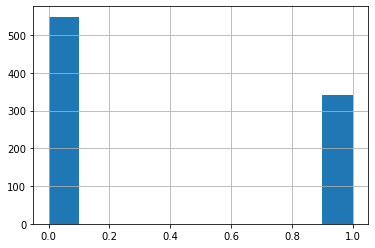

In [123]:
fulldf['Survived'].hist()

#### Out of the ~1200 passengers in the training set two thirds of the passengers were male.

<AxesSubplot:>

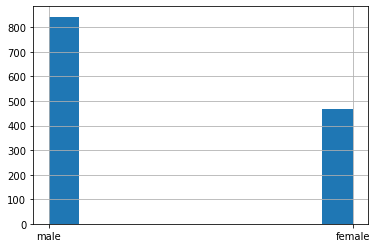

In [124]:
fulldf['Sex'].hist()

#### It appears that the variables that moved most signicificantly with Survived were the Pclass and Fare variables.

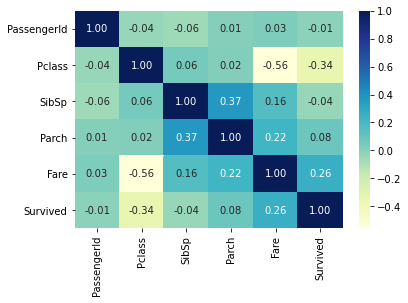

In [125]:
sns.heatmap(fulldf.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.show()

#### Looking at the amount of passengers in 1st, 2nd and 3rd class - the majority of passengers were 3rd passenger class.

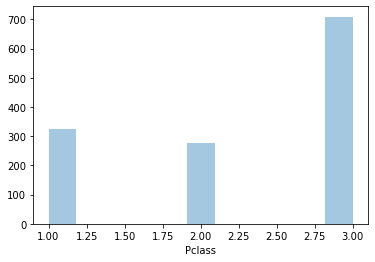

In [126]:
sns.distplot(fulldf['Pclass'], kde=False)
plt.show()

#### Looking at ages of titanic passengers it appears that the majority of the passengers where ~ 30. Did age have an influence on survival?

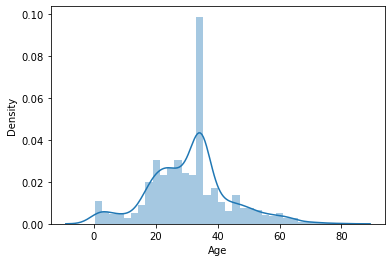

In [145]:
sns.distplot(fulldf['Age'].astype(str), hist=True)
plt.show()

#### Age has a negative correlation with Survival which makes sense logically - young and eldery passengers would be given priority on the rescue boats.

In [86]:
corr = titanictrain['Age'].corr(titanictrain['Survived'])
print(round(corr, 3))

-0.053


#### It appears that Passengers in Pclass 1 have a higher survival rate than other Pclasses - This could be due to first class tickets being closer to the top of the boat and closer to escape boats.

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

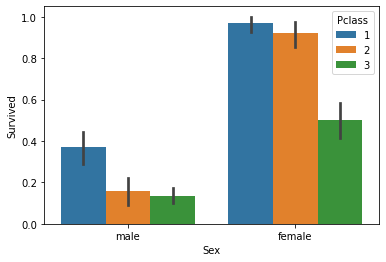

In [146]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=fulldf)

#### Furthering exploring the age and sex of Titanic Passengers.
###### The first plot, the stripplot of Titanic passengers age viewed by survival or non-survival indicates that more females than males survived.

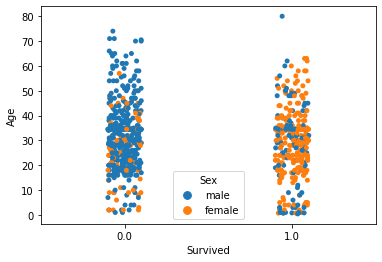

In [147]:
sns.stripplot(x='Survived', y='Age', hue='Sex', data=fulldf)
plt.show()

###### The violin plot below indicates that the survivors of the Titanic had a wager range of age meaning more children and elderly passengers were prioritized.

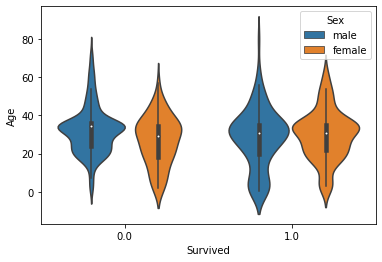

In [148]:
sns.violinplot(x='Survived',y='Age',hue='Sex', data=fulldf)
plt.show()